# **DataThon**

## **Importações das bibliotecas**

In [39]:
from pathlib import Path

import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


## **Importação dos dados**

In [40]:
caminho_train = Path('Datasets/train.csv')
caminho_teste = Path('Datasets/test.csv')

df_train = pd.read_csv(caminho_train)
df_test = pd.read_csv(caminho_teste)

### **Descrição dos dados**

In [41]:
print(f'Descrição do dados Treinamento {df_train.describe()}')
print(f'Descrição do dados Teste {df_test.describe()}')

Descrição do dados Treinamento                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.64540

### **Informações**

In [42]:
print(f'Informações do dados Treinamento {df_train.info()}')
print(f'Informações do dados Teste {df_test.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### **Merge dos dados de treinamento e teste**

In [43]:
df_concat = pd.concat((df_train.loc[:, :], df_test.loc[:, :]))
df_concat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


### **Analisando as colunas do typo object**

In [44]:
coluna_object = df_concat.select_dtypes(include='object').columns
coluna_object

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### **Analisando os dados do tipo number**

In [45]:
coluna_number = df_concat.select_dtypes(include='number').columns
coluna_number

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### **Tratando os dados com outliers e dados faltantes do type number**

In [49]:
def tratar_dados_numericos(df, colunas_numericas):
    # Criar uma cópia explícita do DataFrame
    df_tratado = df.copy(deep=True)
    
    # Resetar o índice para evitar problemas com duplicatas
    df_tratado = df_tratado.reset_index(drop=True)
    
    # Colunas que não devem ter outliers removidos
    colunas_sem_outliers = ['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 
                           'MoSold', 'YrSold', 'BsmtFullBath', 'BsmtHalfBath', 
                           'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                           'Fireplaces', 'GarageCars']
    
    # Colunas que podem ter outliers tratados
    colunas_com_outliers = [col for col in colunas_numericas 
                           if col not in colunas_sem_outliers]
    
    # 1. Tratamento de valores faltantes
    for coluna in colunas_numericas:
        if df_tratado[coluna].isnull().any():
            if coluna == 'GarageYrBlt':
                df_tratado[coluna] = df_tratado[coluna].fillna(df_tratado['YearBuilt'])
            
            elif coluna == 'LotFrontage':
                # Calcular medianas por bairro
                medianas_bairro = df_tratado.groupby('Neighborhood')[coluna].transform('median')
                df_tratado[coluna] = df_tratado[coluna].fillna(medianas_bairro)
            
            elif coluna in ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
                df_tratado[coluna] = df_tratado[coluna].fillna(0)
            
            else:
                df_tratado[coluna] = df_tratado[coluna].fillna(df_tratado[coluna].median())
    
    # 2. Tratamento de outliers para colunas selecionadas
    for coluna in colunas_com_outliers:
        Q1 = df_tratado[coluna].quantile(0.25)
        Q3 = df_tratado[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        df_tratado[coluna] = df_tratado[coluna].clip(lower=limite_inferior, upper=limite_superior)
    
    return df_tratado

In [50]:
df_tratado = tratar_dados_numericos(df_concat, coluna_number)

In [54]:
def visualizar_tratamento_v2(df_original, df_tratado, coluna):
    # Configurar o estilo
    sns.set_style("whitegrid")
    
    # Criar a figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plotar usando seaborn
    sns.boxplot(data=df_original, y=coluna, ax=ax1)
    ax1.set_title(f'{coluna} - Antes do tratamento')
    
    sns.boxplot(data=df_tratado, y=coluna, ax=ax2)
    ax2.set_title(f'{coluna} - Depois do tratamento')
    
    # Ajustar o layout
    plt.tight_layout()
    plt.show()

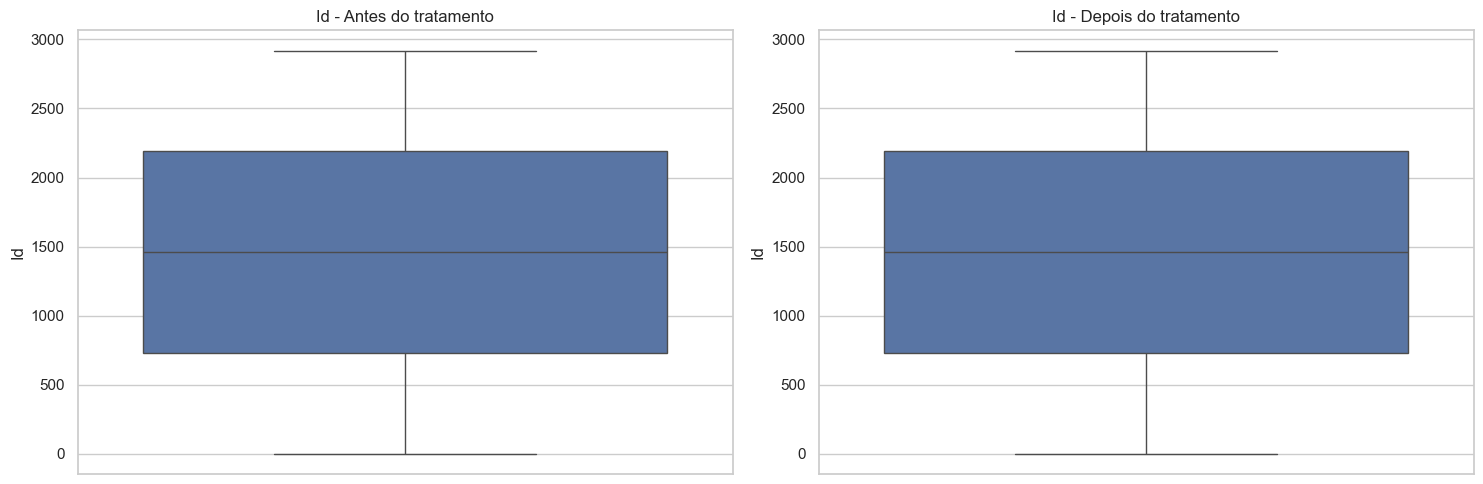

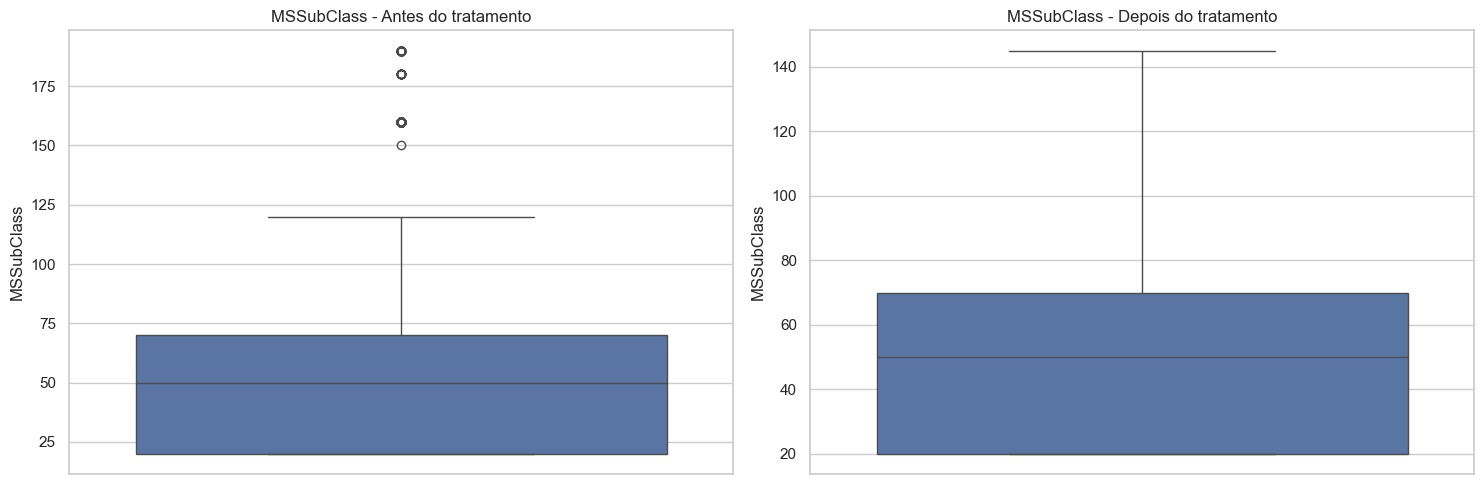

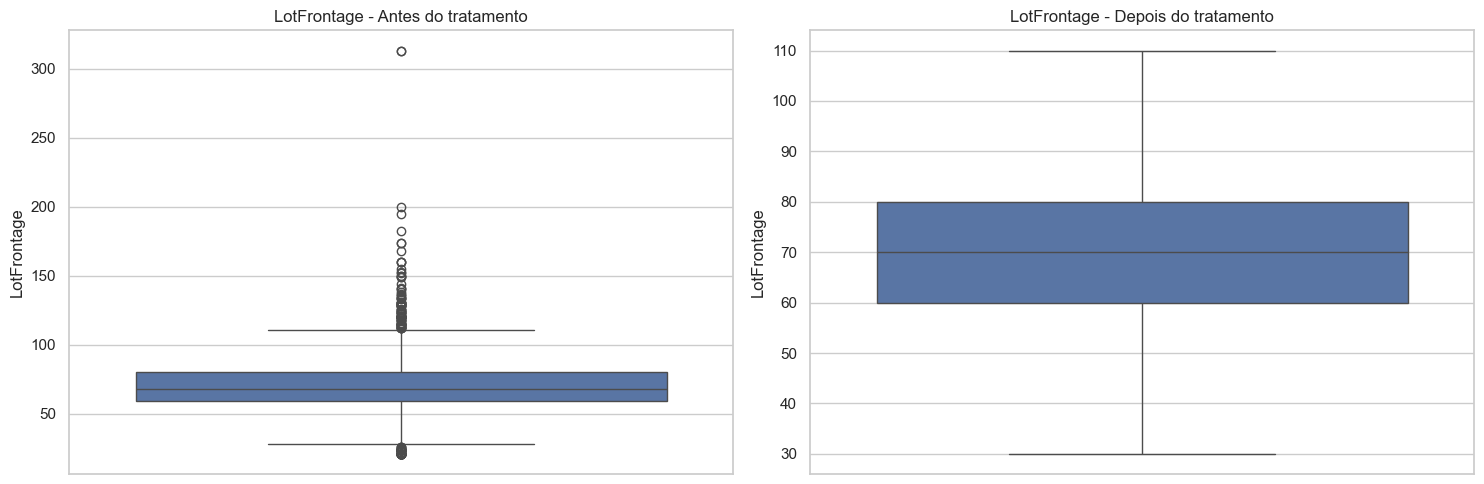

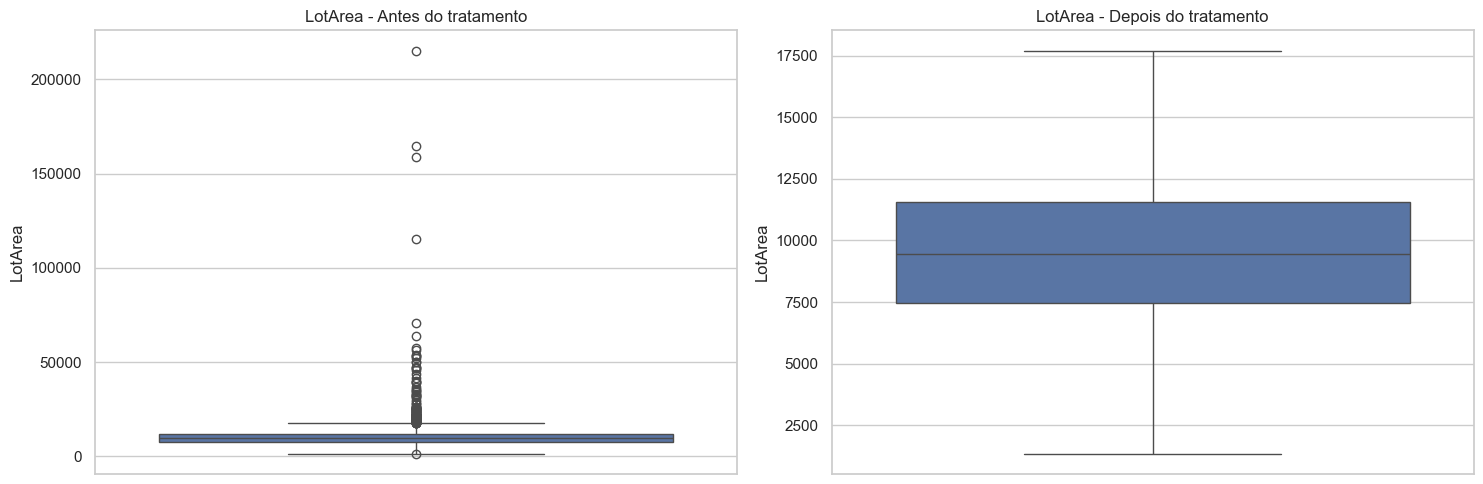

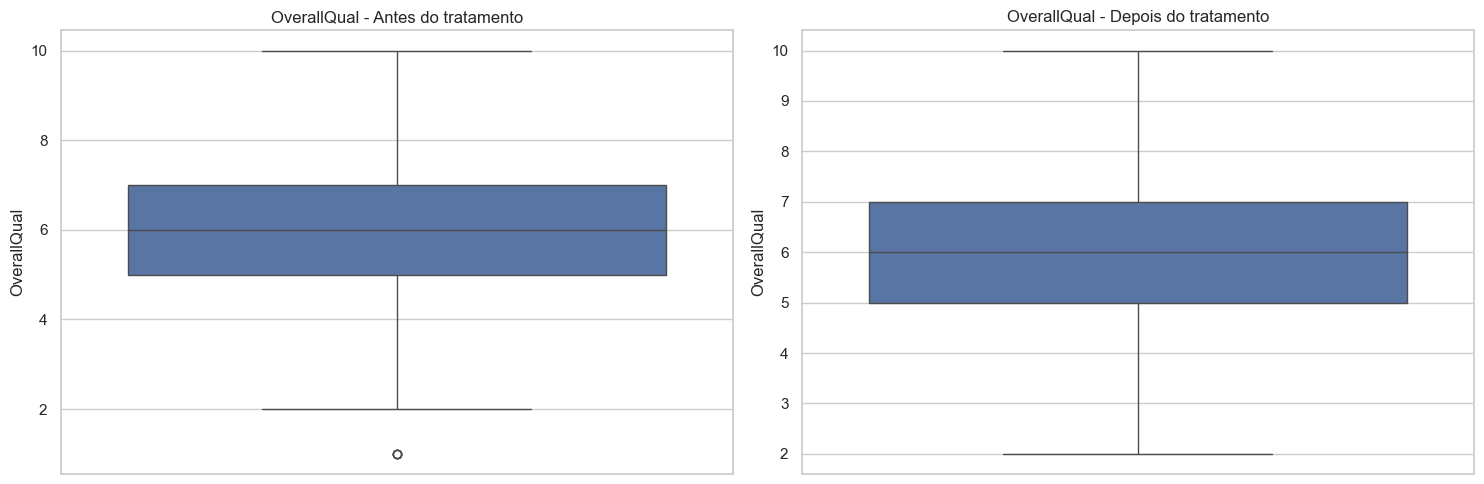

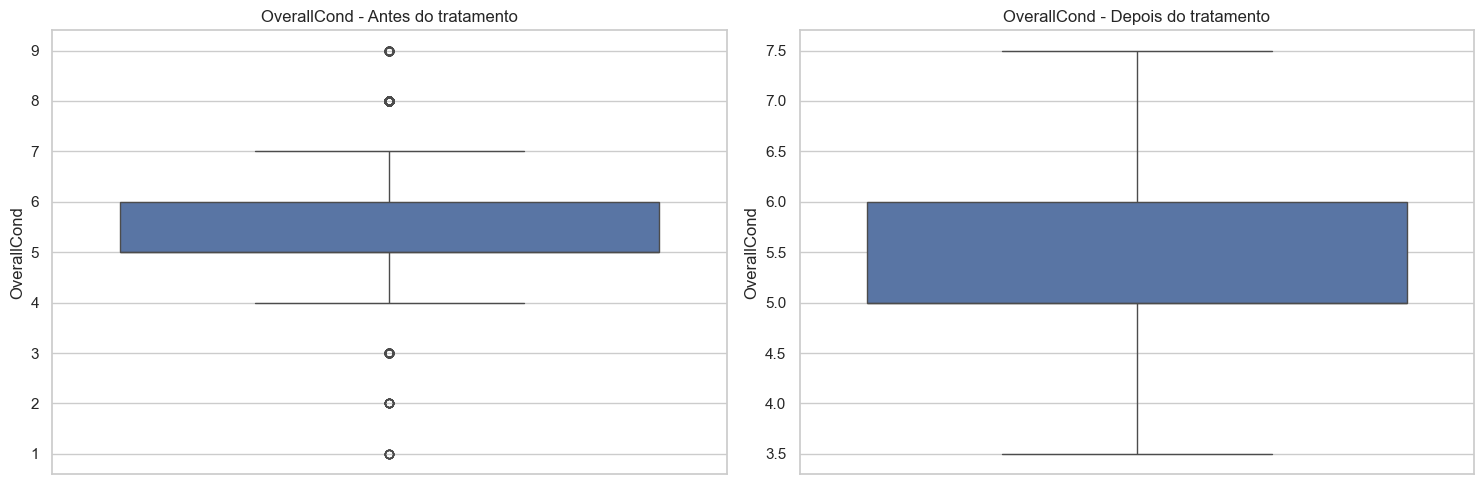

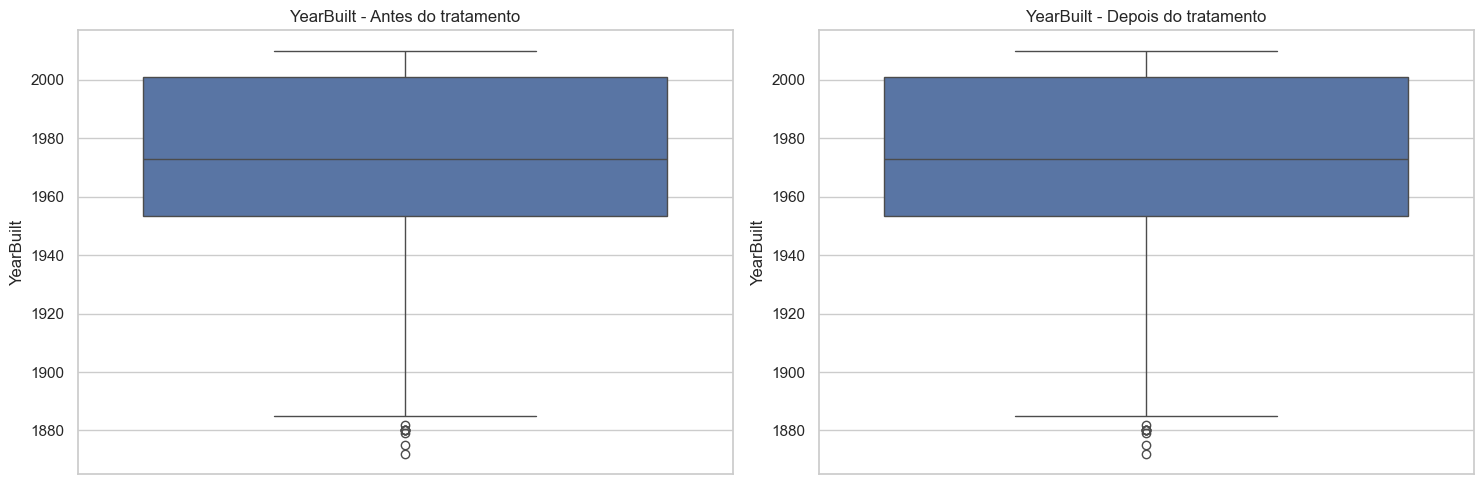

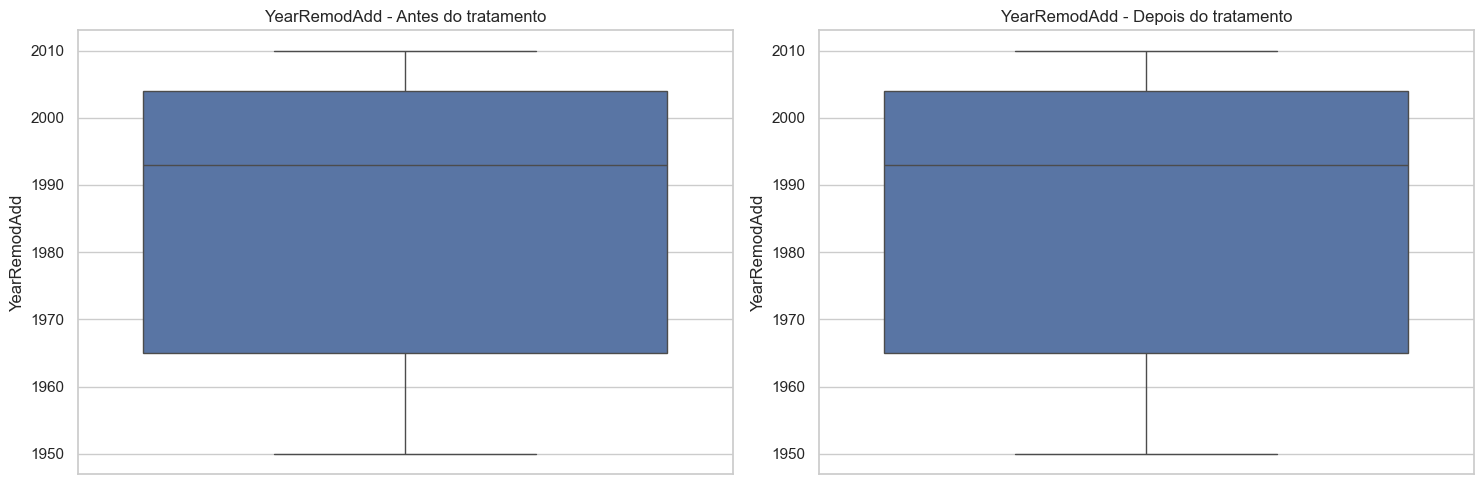

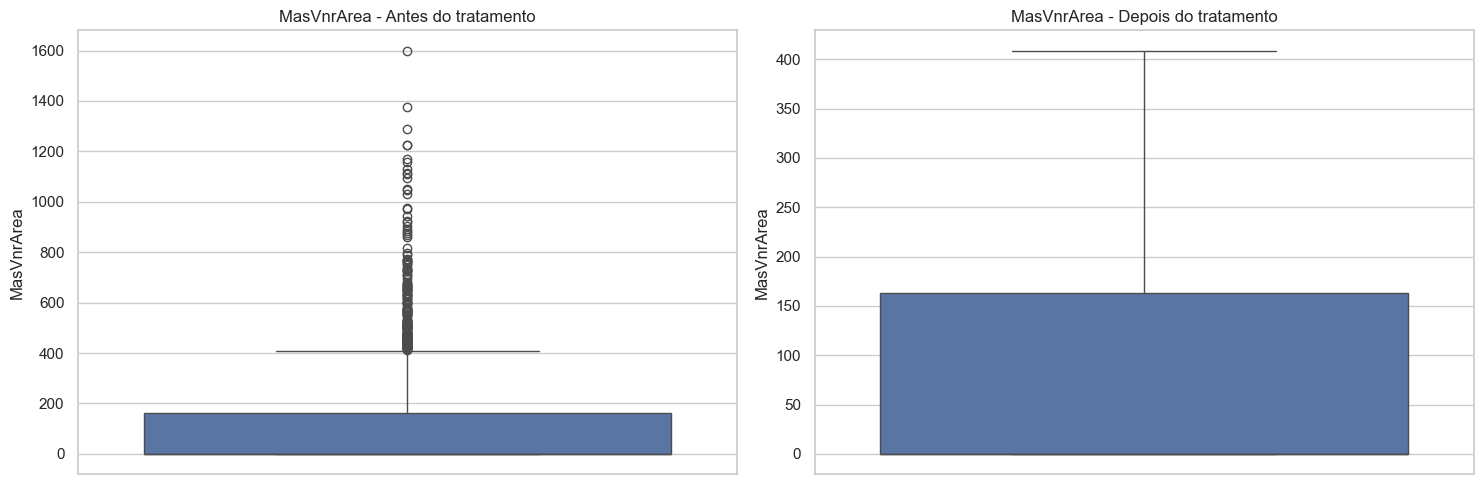

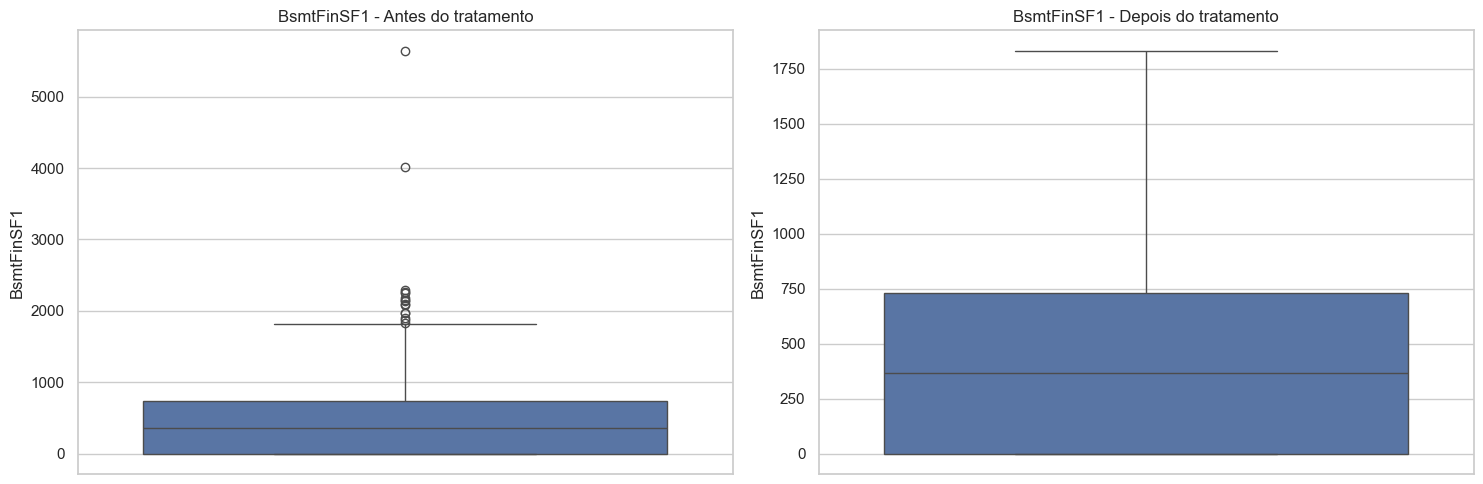

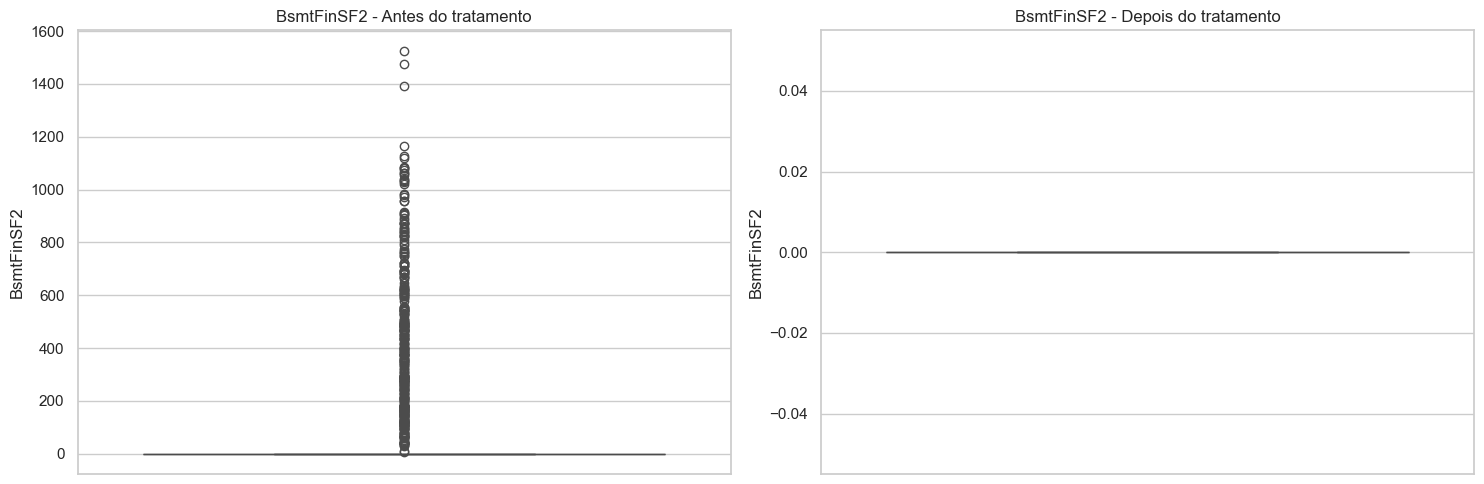

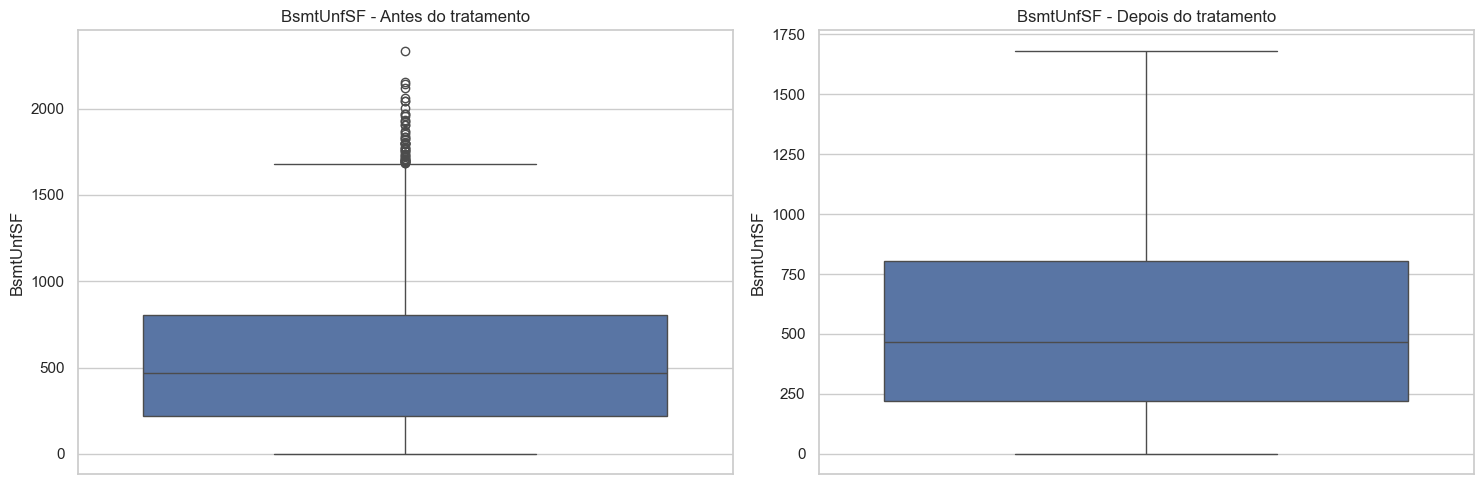

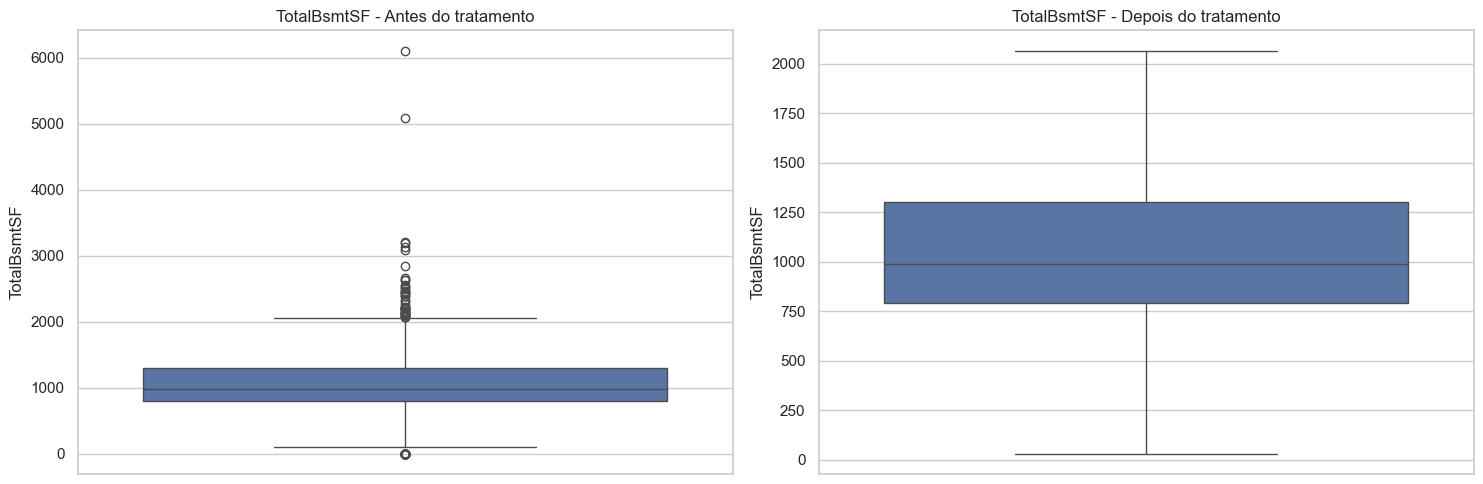

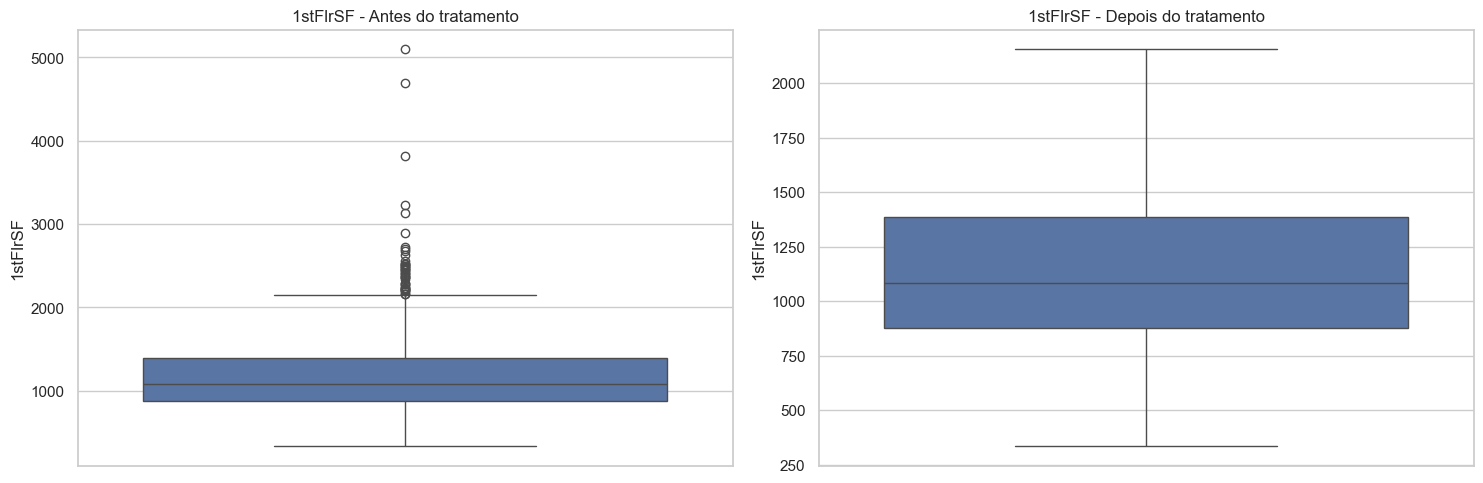

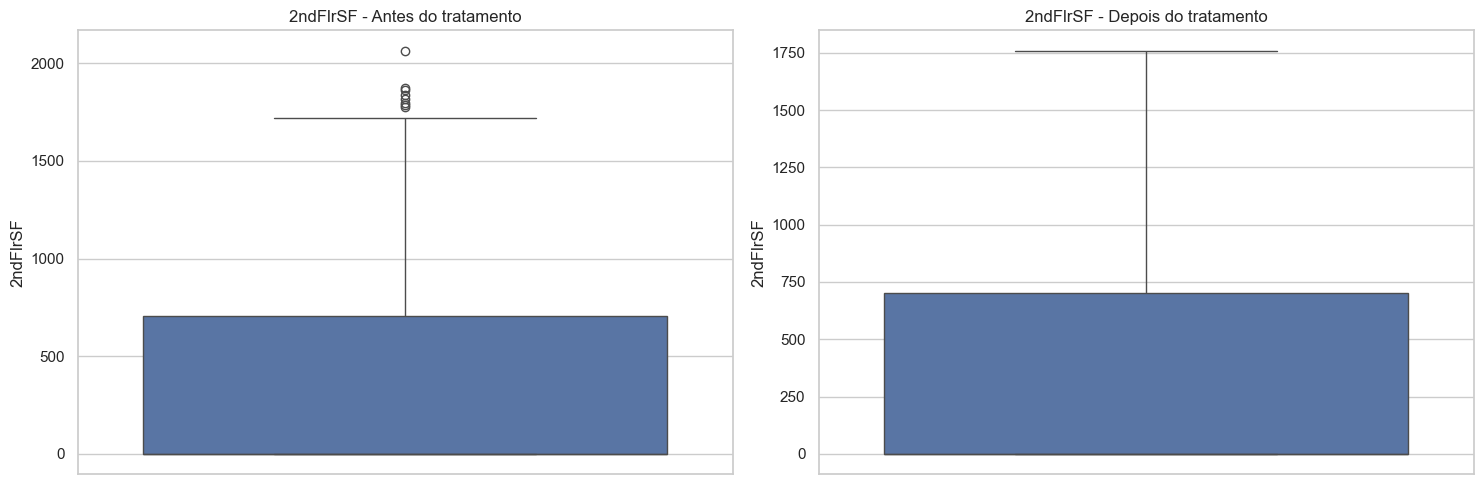

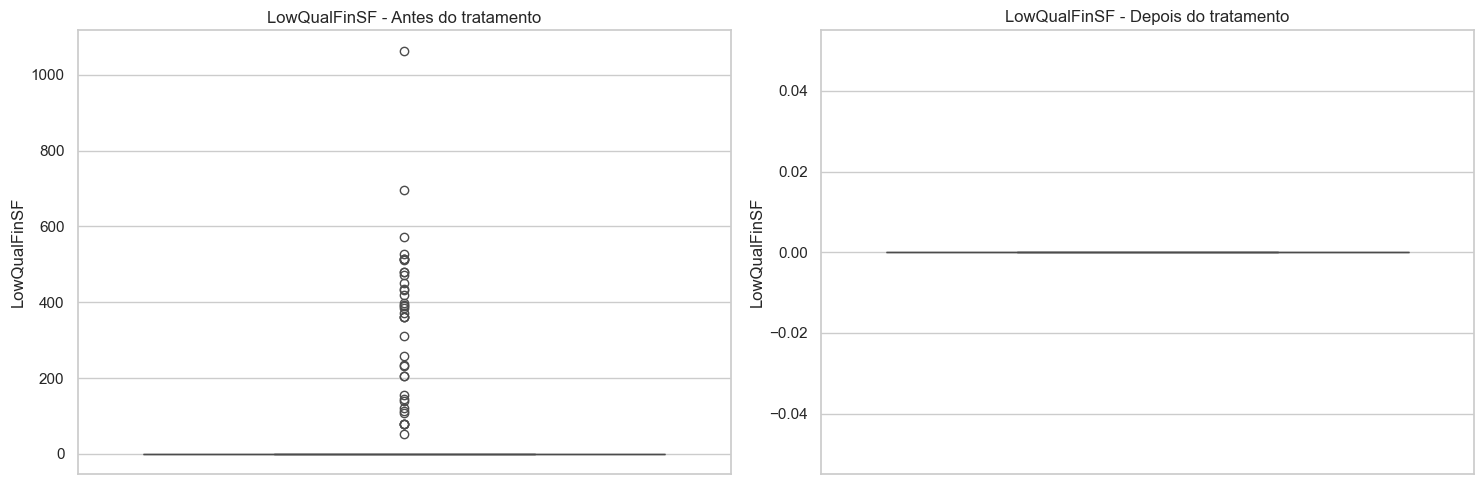

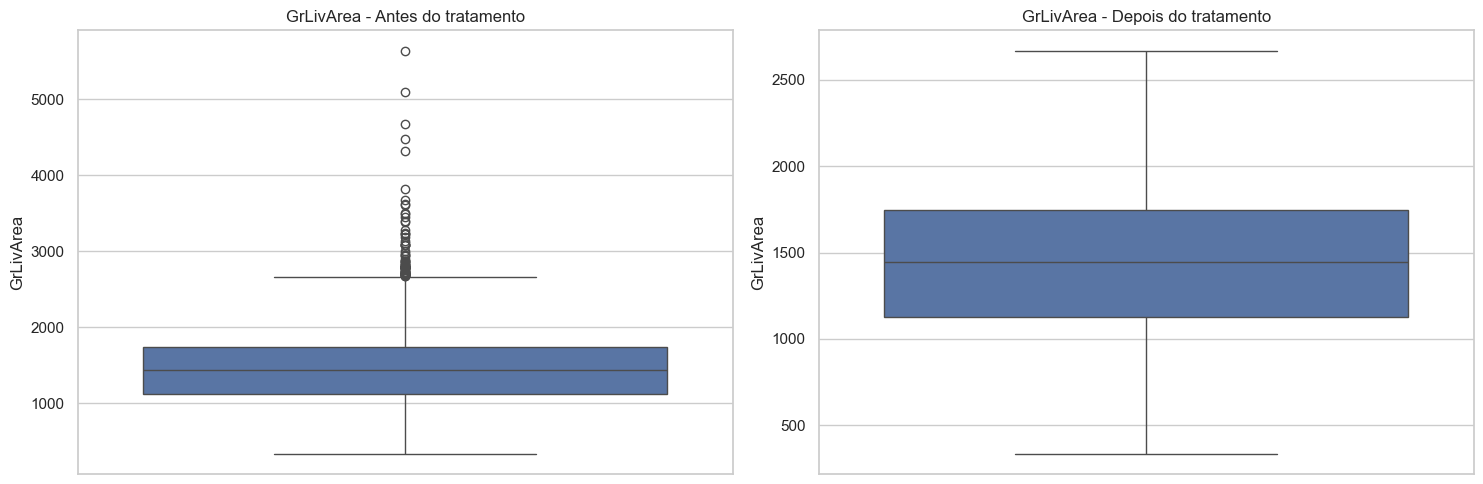

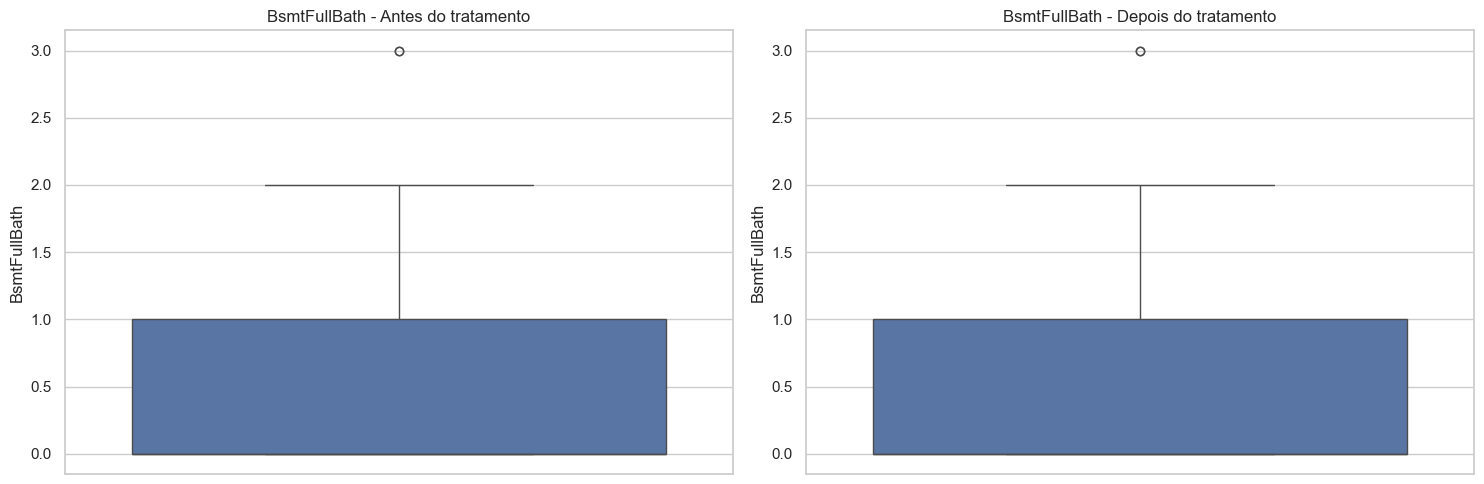

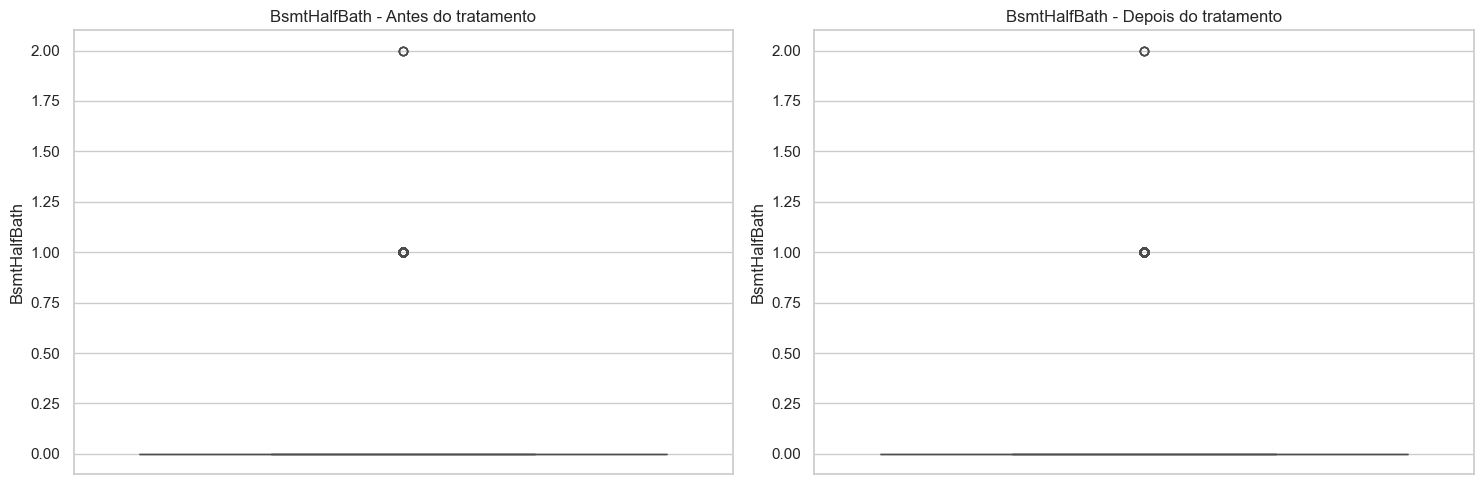

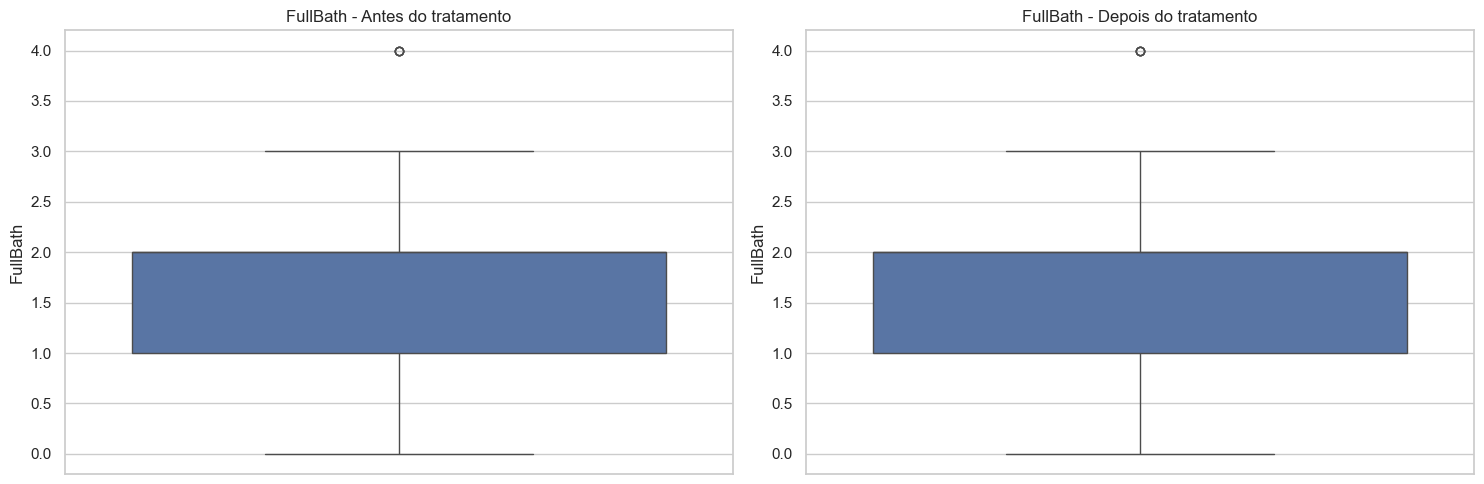

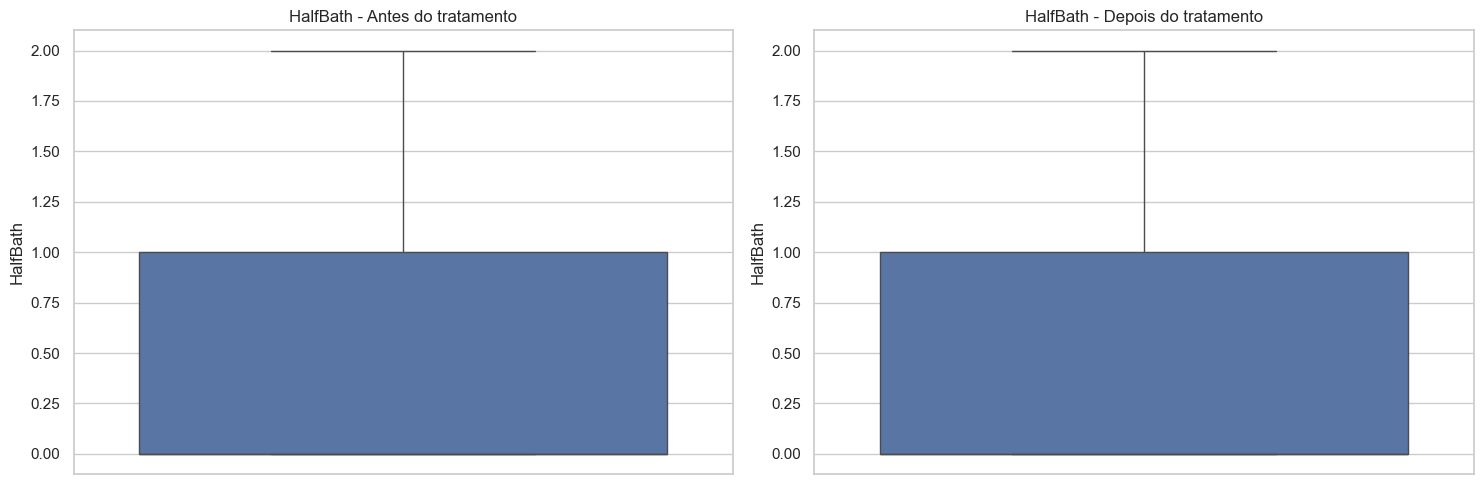

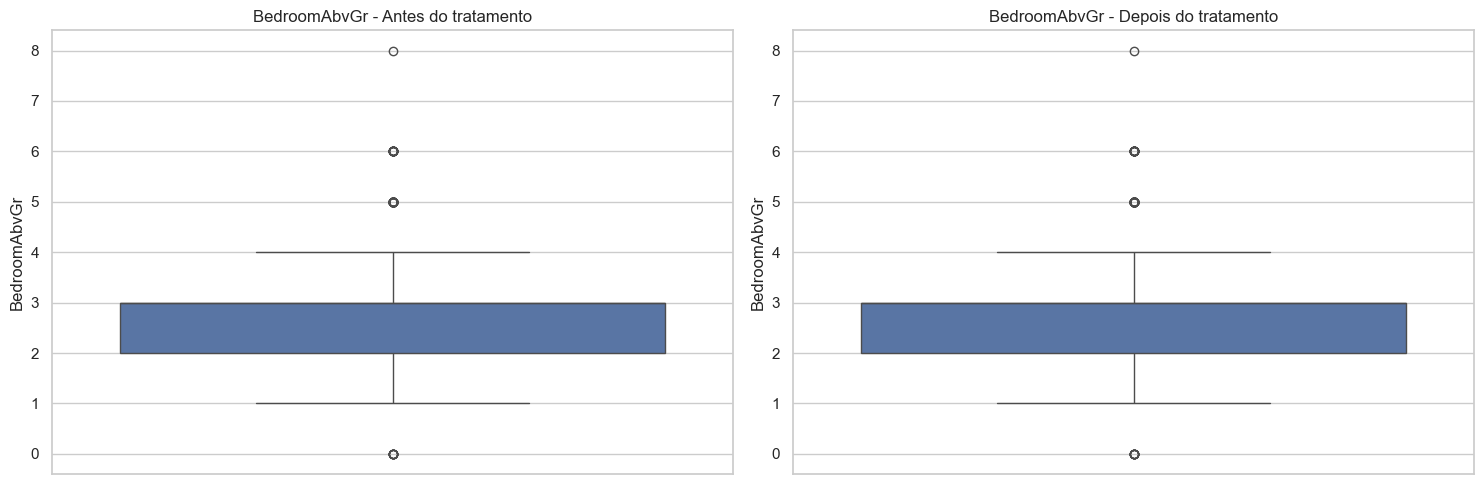

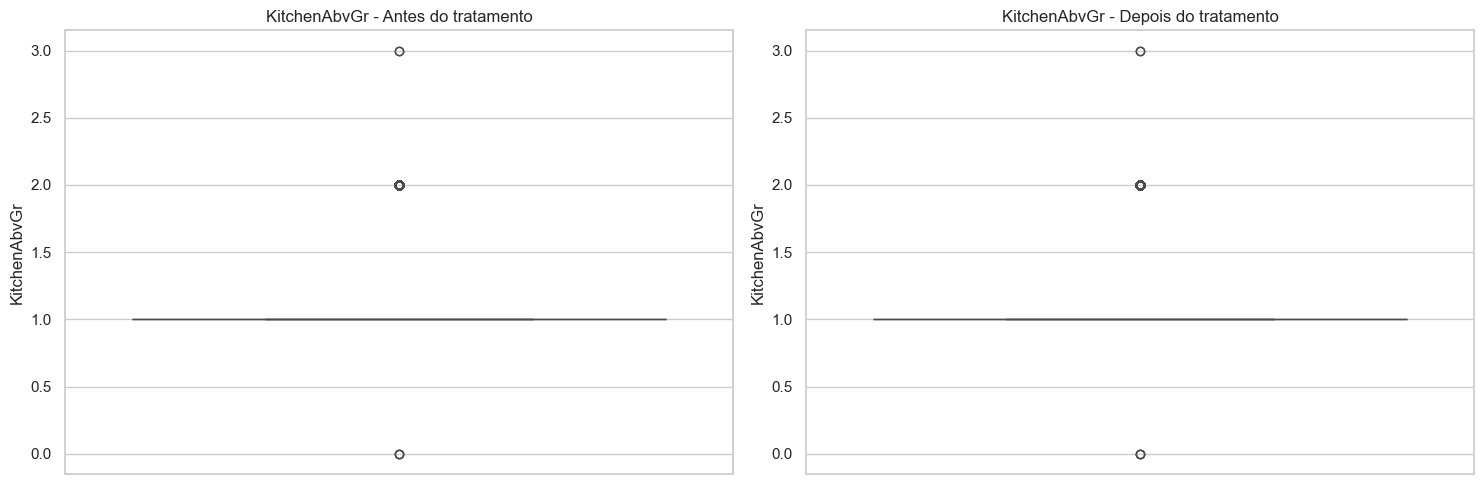

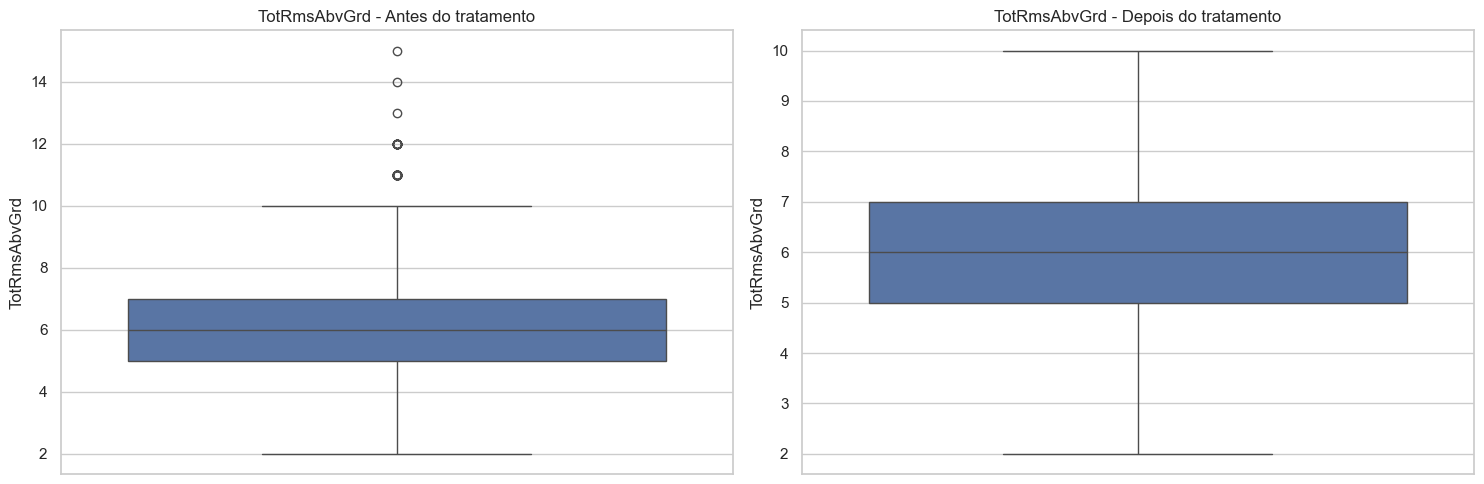

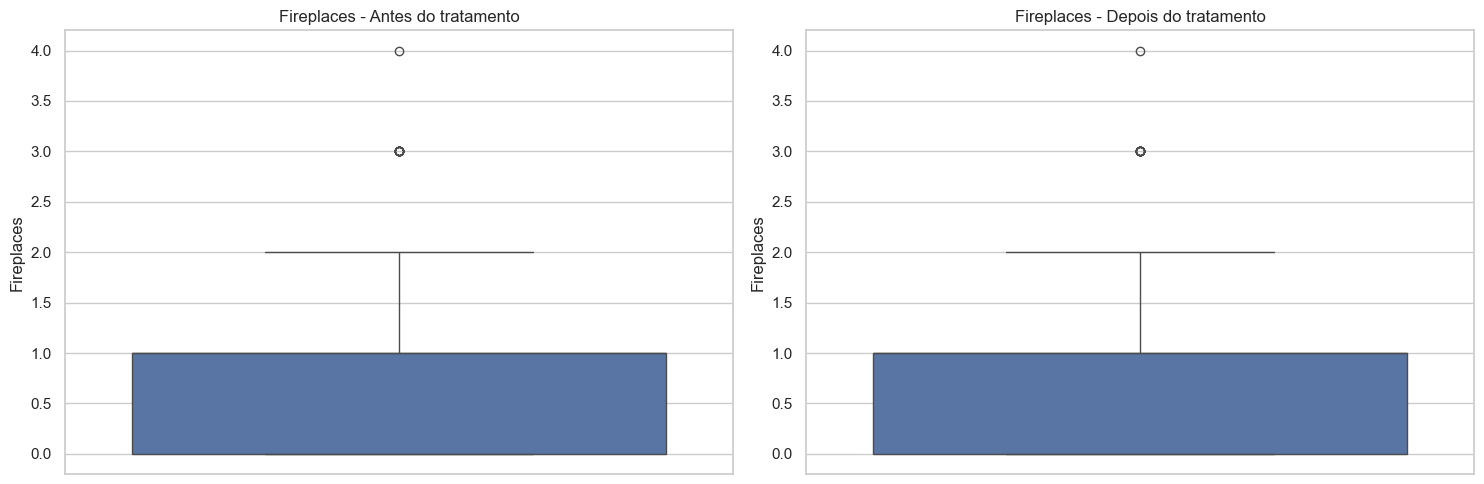

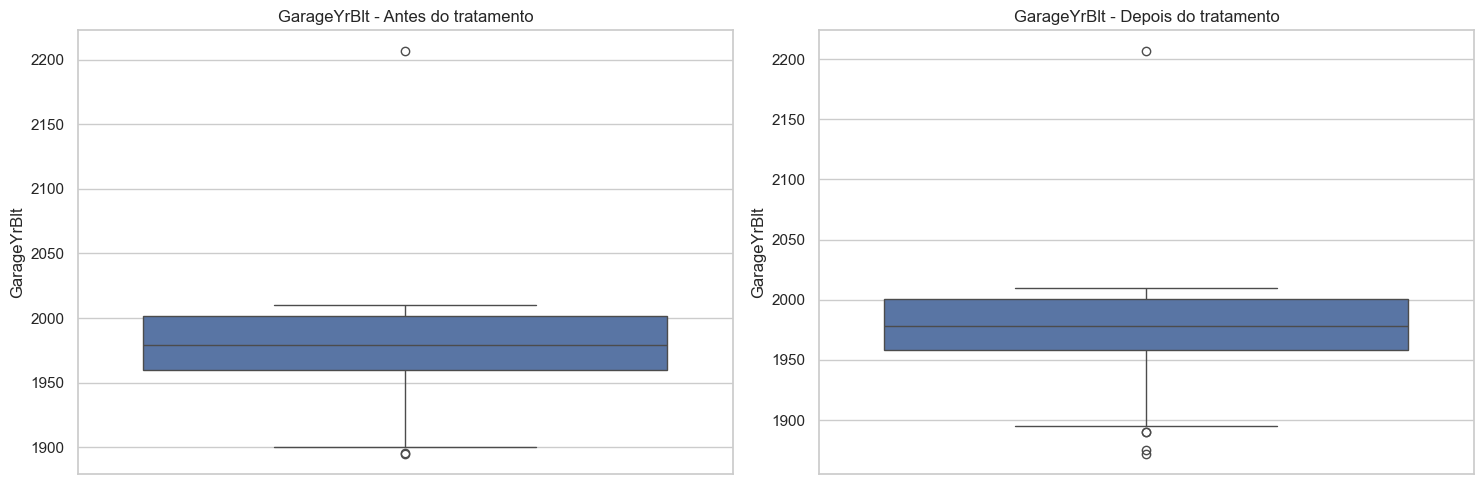

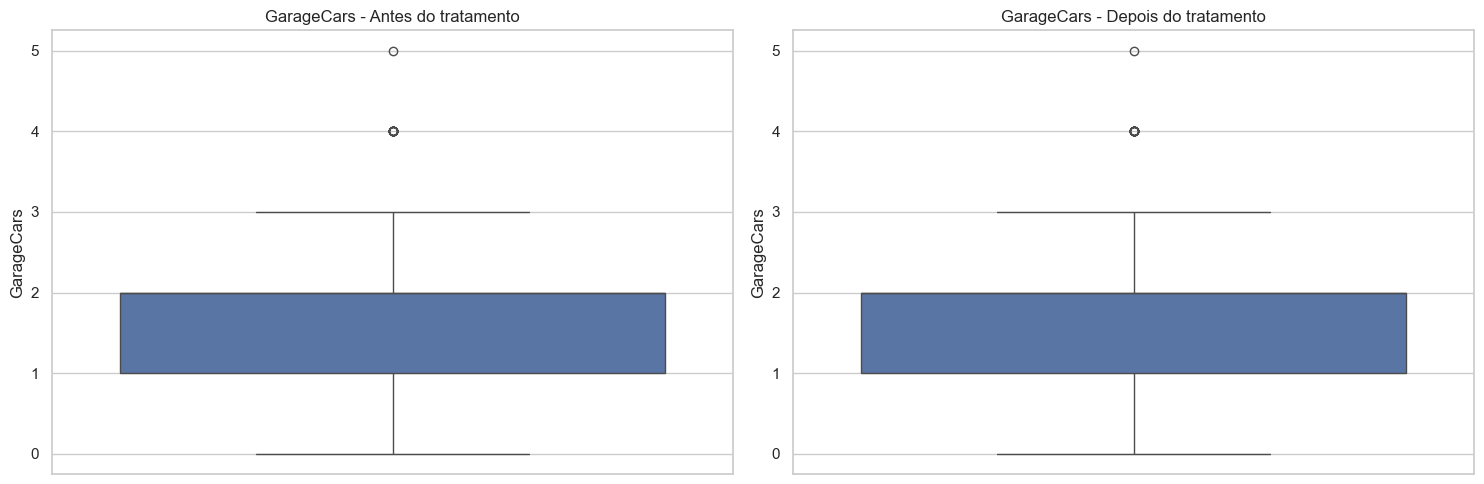

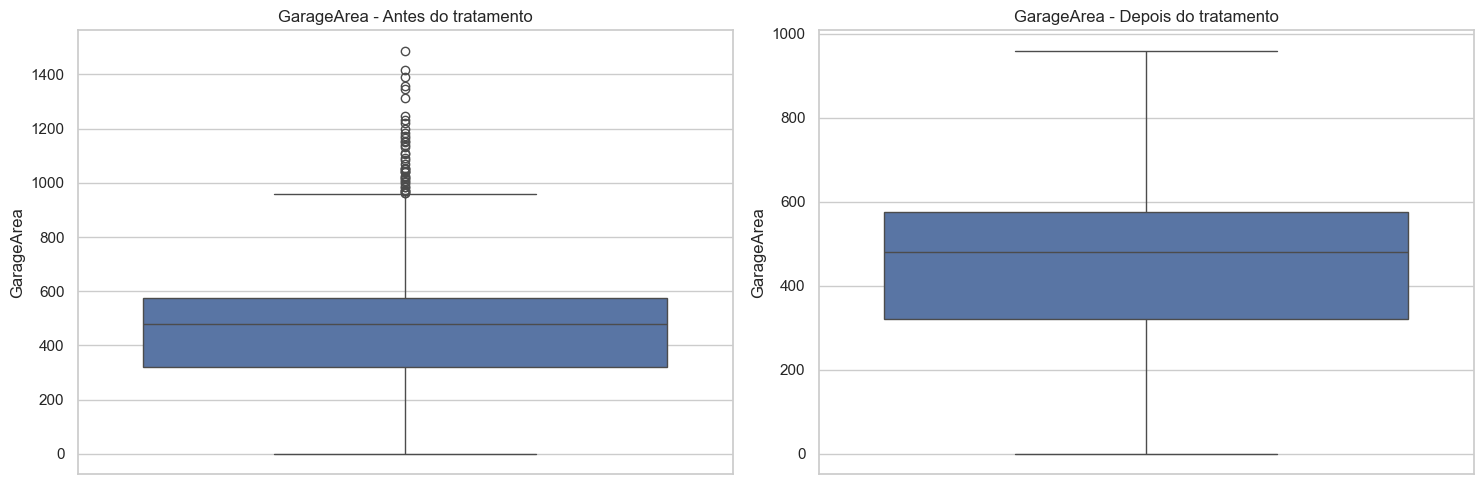

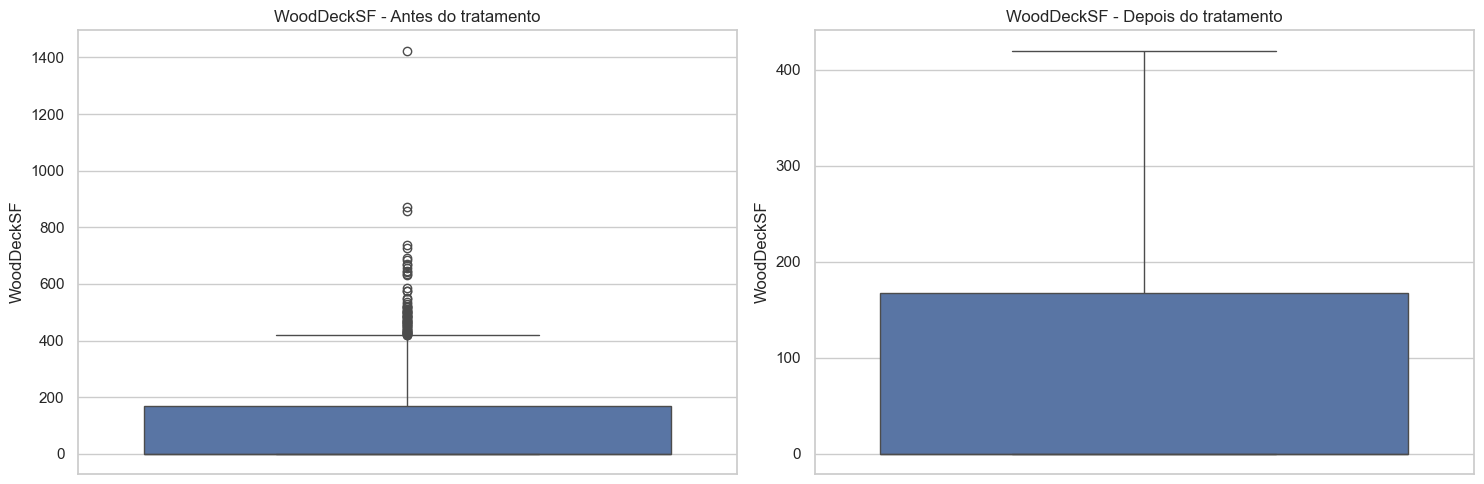

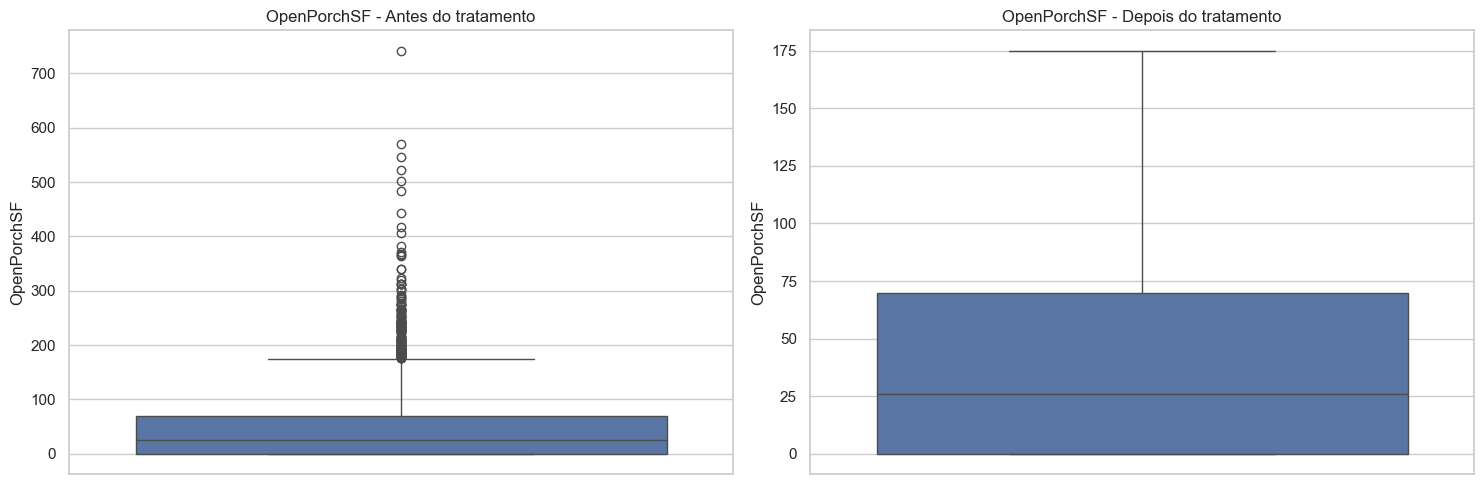

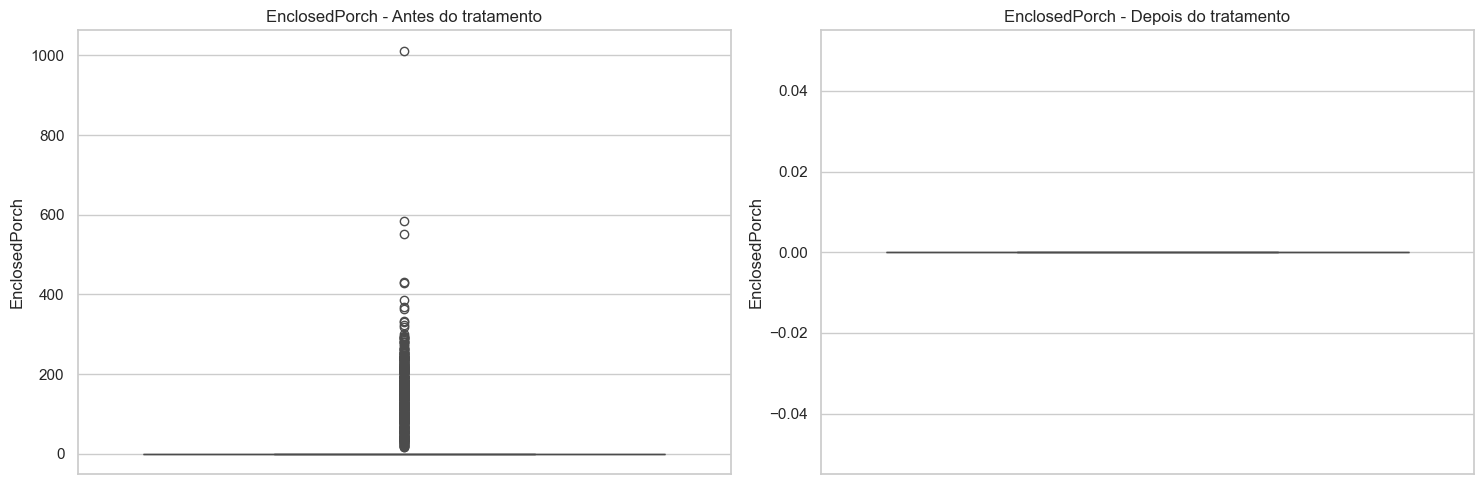

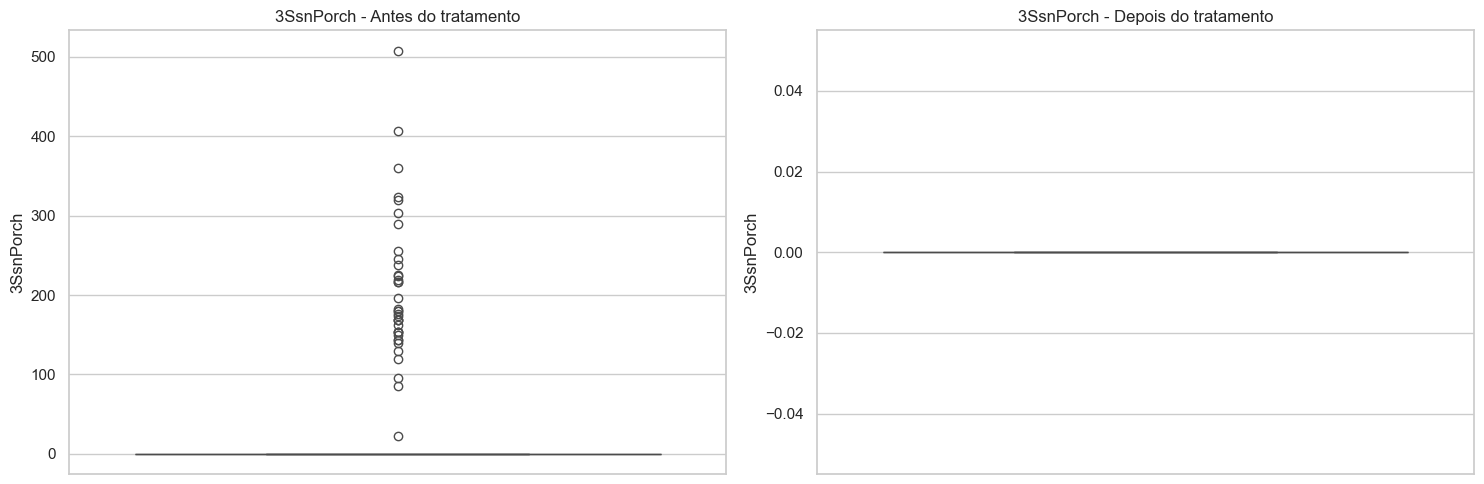

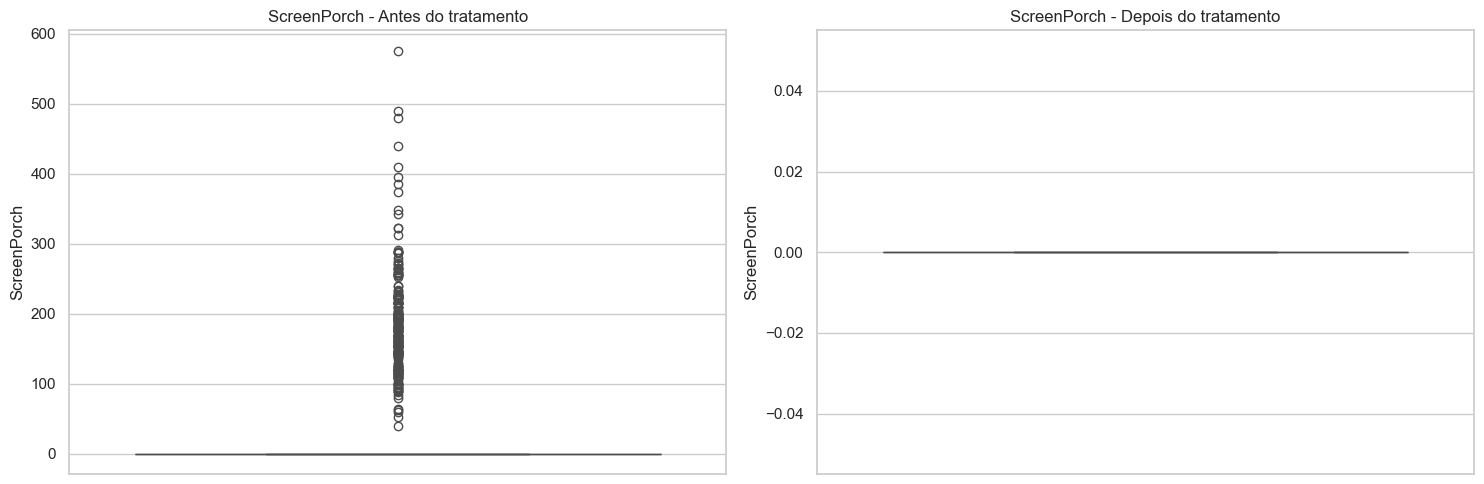

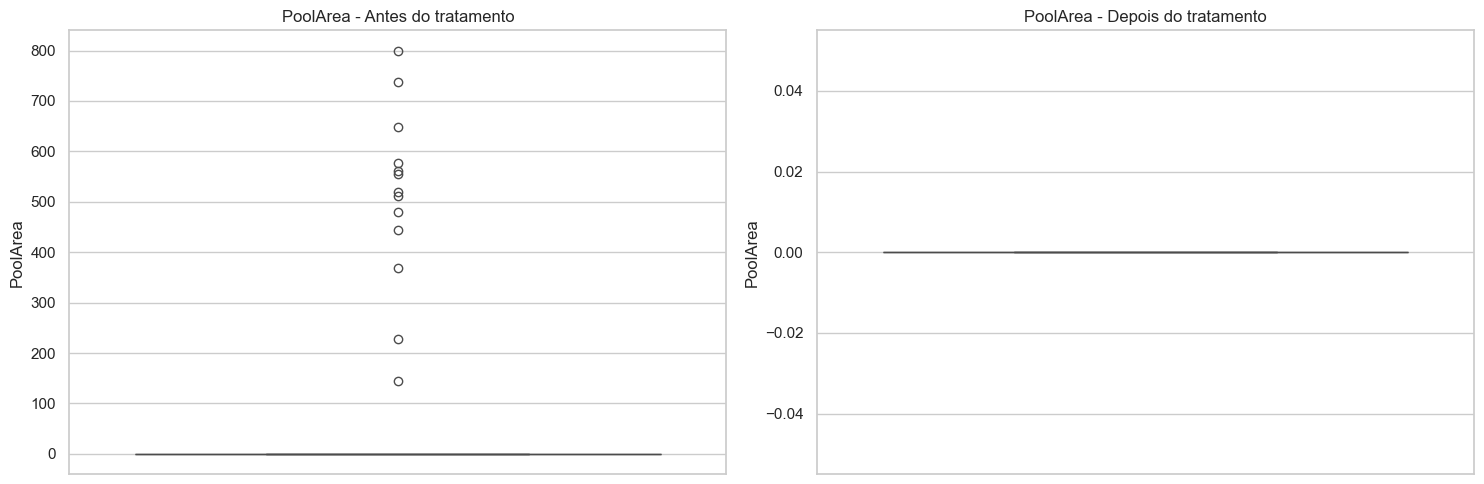

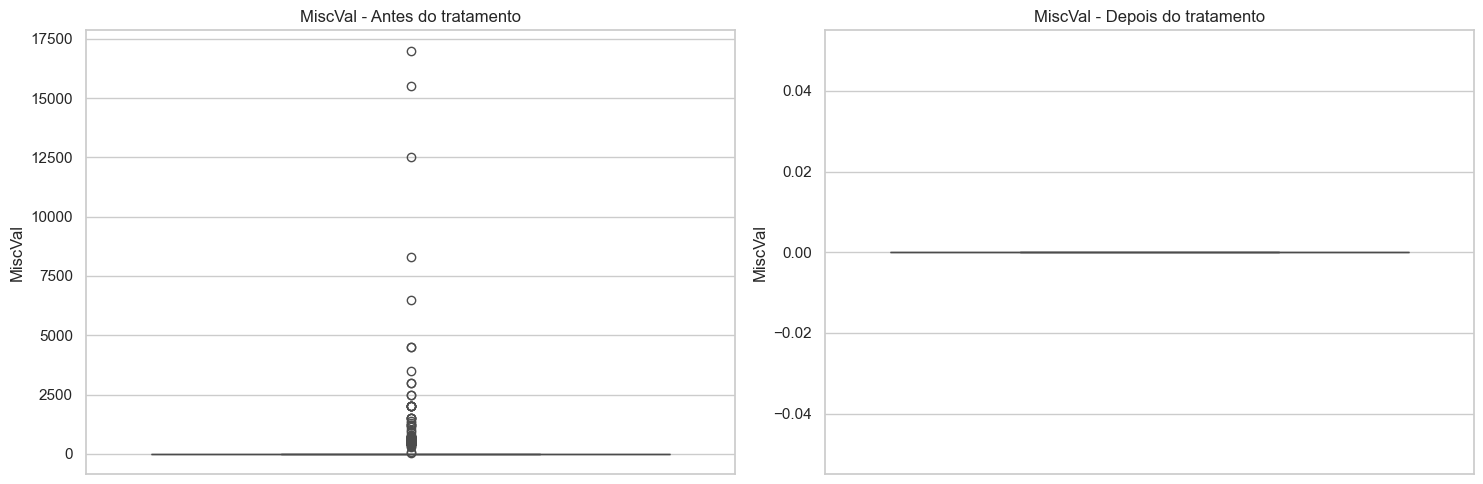

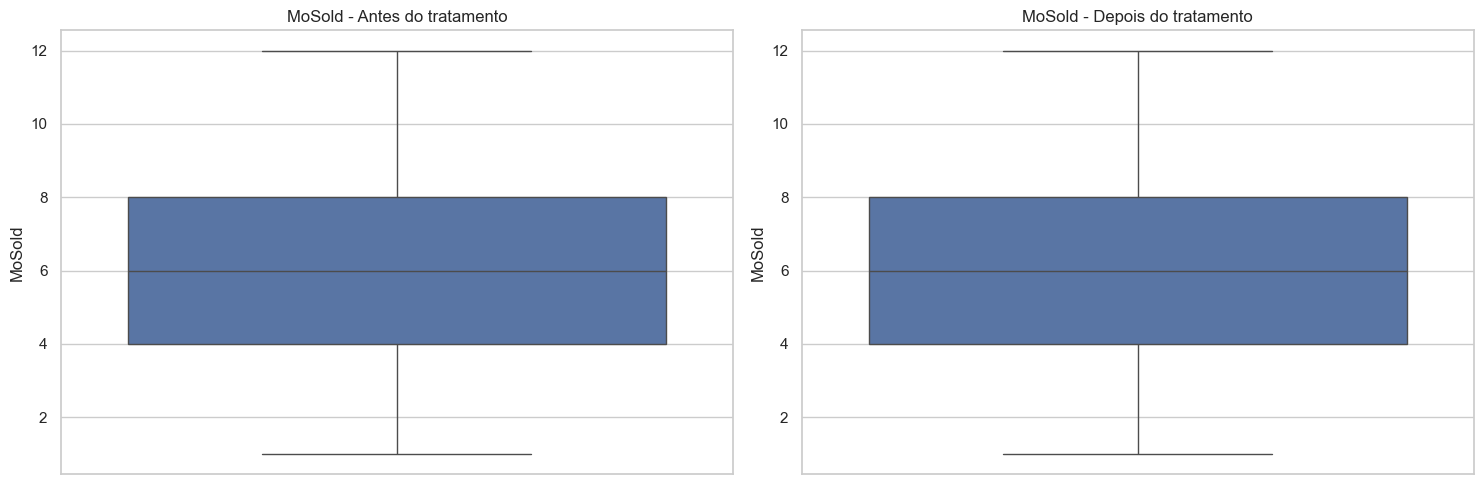

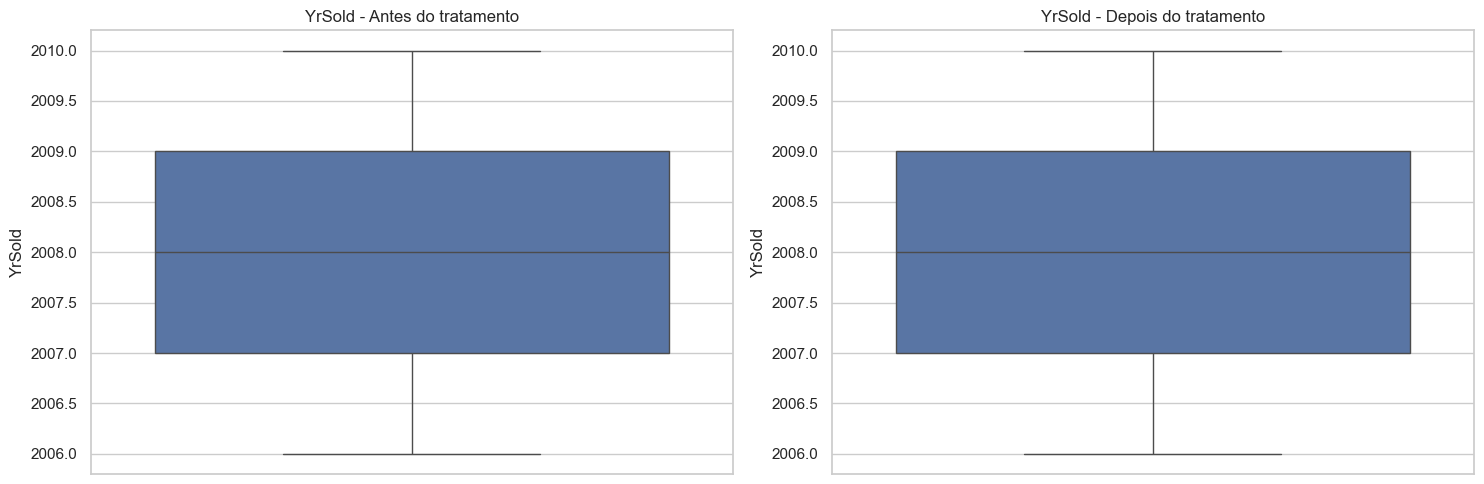

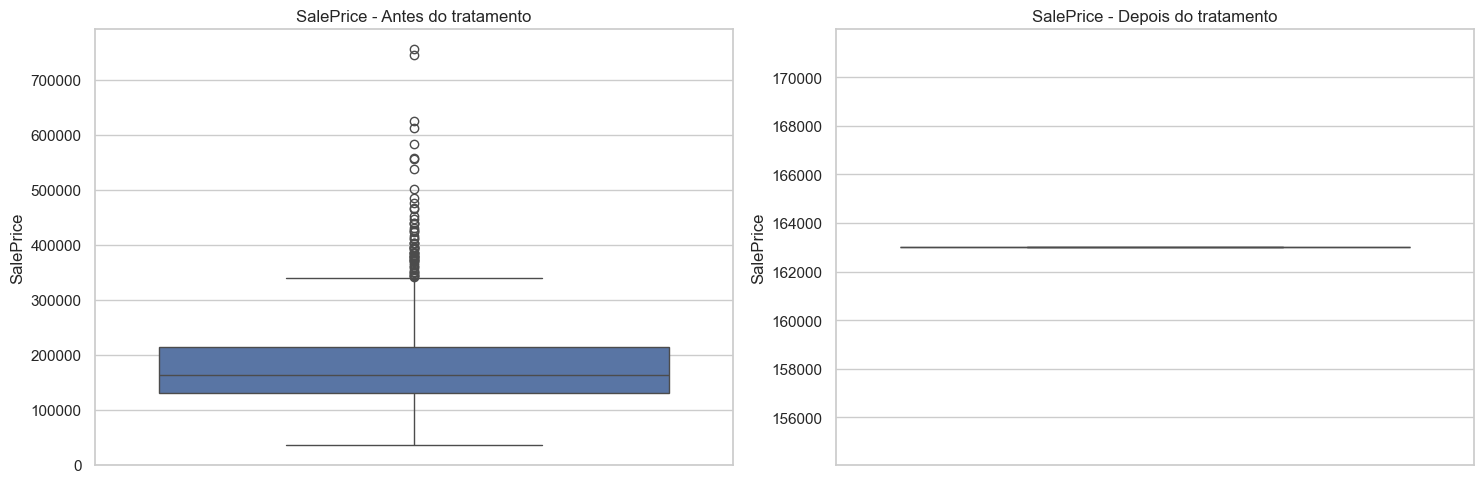

In [64]:
for coluna in coluna_number:
    visualizar_tratamento_v2(df_concat, df_tratado, coluna)